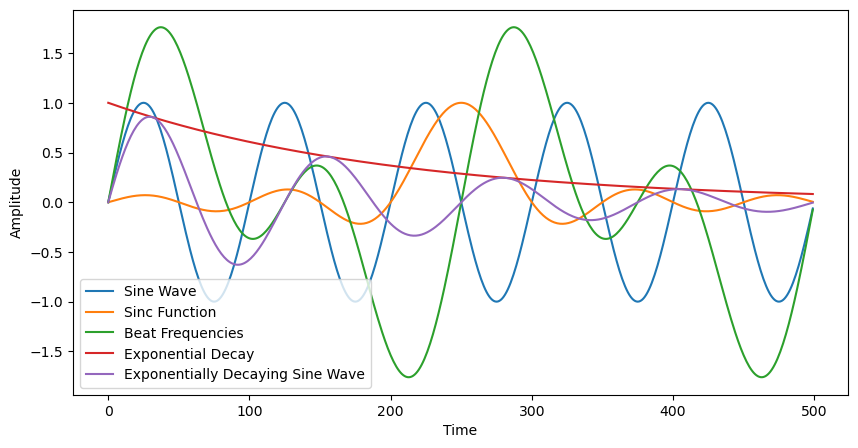

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sine_wave(length, frequency, amplitude=1, phase=0, noise_std=0):
    """Generates a sine wave."""
    time = np.arange(length)
    signal = amplitude * np.sin(2 * np.pi * frequency * time / length + phase)
    if noise_std > 0:
        noise = np.random.normal(0, noise_std, length)
        signal += noise
    return time, signal

def generate_sinc(length, center, width=1, amplitude=1, noise_std=0):
    """Generates a sinc function."""
    time = np.arange(length)
    x = (time - center) / width
    signal = amplitude * np.sinc(x)
    if noise_std > 0:
        noise = np.random.normal(0, noise_std, length)
        signal += noise
    return time, signal

def generate_beat_frequencies(length, freq1, freq2, amplitude=1, noise_std=0):
    """Generates beat frequencies."""
    time = np.arange(length)
    signal = amplitude * (np.sin(2 * np.pi * freq1 * time / length) + np.sin(2 * np.pi * freq2 * time / length))
    if noise_std > 0:
        noise = np.random.normal(0, noise_std, length)
        signal += noise
    return time, signal

def generate_exponential_decay(length, decay_rate, amplitude=1, noise_std=0):
    """Generates an exponential decay."""
    time = np.arange(length)
    signal = amplitude * np.exp(-decay_rate * time / length)
    if noise_std > 0:
        noise = np.random.normal(0, noise_std, length)
        signal += noise
    return time, signal

def generate_exp_decaying_sine_wave(length, frequency, decay_rate, amplitude=1, phase=0, noise_std=0):
    """Generates an exponentially decaying sine wave."""
    time = np.arange(length)
    envelope = amplitude * np.exp(-decay_rate * time / length)
    signal = envelope * np.sin(2 * np.pi * frequency * time / length + phase)
    if noise_std > 0:
        noise = np.random.normal(0, noise_std, length)
        signal += noise
    return time, signal

# Example Usage and Plotting
length = 500
noise_std = 0.0
amplitude = 1.0
decay_rate = 2.5
freq1 = 2
freq2 = 4

# Sine Wave
time_sine, sine_signal = generate_sine_wave(length, frequency=5, amplitude=amplitude, noise_std=noise_std)
plt.figure(figsize=(10, 5))
plt.plot(time_sine, sine_signal, label="Sine Wave")

# Sinc Function
time_sinc, sinc_signal = generate_sinc(length, center=length // 2, width=50, amplitude=amplitude, noise_std=noise_std)
plt.plot(time_sinc, sinc_signal, label="Sinc Function")

# Beat Frequencies
time_beat, beat_signal = generate_beat_frequencies(length, freq1=freq1, freq2=freq2, amplitude=amplitude, noise_std=noise_std)
plt.plot(time_beat, beat_signal, label="Beat Frequencies")

# Exponential Decay
time_exp_decay, exp_decay_signal = generate_exponential_decay(length, decay_rate=decay_rate, amplitude=amplitude, noise_std=noise_std)
plt.plot(time_exp_decay, exp_decay_signal, label="Exponential Decay")

# Exponentially Decaying Sine Wave
time_exp_sine, exp_sine_signal = generate_exp_decaying_sine_wave(length, frequency=freq2, decay_rate=decay_rate, amplitude=amplitude, noise_std=noise_std)
plt.plot(time_exp_sine, exp_sine_signal, label="Exponentially Decaying Sine Wave")

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [1]:
import numpy as np

def hankel_embedding(x, tau, D):
    """Creates a Hankel-style embedding from a 1D time series, maximizing data retention.
    
    Args:
        x (numpy array): 1D time series.
        tau (int): Time delay between embeddings.
        D (int): Number of delays (embedding dimension).
    
    Returns:
        list of numpy arrays: Each row is a lagged version of `x` with as much data as possible.
    """
    N = len(x)
    embedded = [x[i:N - (D - 1 - i) * tau] for i in range(D)]
    return np.vstack(embedded)

# Example Usage
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
tau = 2  # Time delay
D = 3    # Number of offsets

embedded = hankel_embedding(x, tau, D)
print(embedded)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 6 and the array at index 1 has size 7

In [2]:
import numpy as np

def hankel_embedding(x, tau, D):
    """Creates a Hankel-style embedding from a 1D time series.
    
    Args:
        x (numpy array): 1D time series.
        tau (int): Time delay between embeddings.
        D (int): Number of delays (embedding dimension).
    
    Returns:
        numpy array: 2D embedded representation.
    """
    N = len(x)
    if (D - 1) * tau >= N:
        raise ValueError("Embedding parameters exceed time series length.")

    return np.array([x[i : N - (D - 1) * tau + i : tau] for i in range(D)])

# Example Usage
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Example time series
tau = 2  # Time delay
D = 3    # Number of offsets

embedded = hankel_embedding(x, tau, D)
print(embedded)


[[1 3 5]
 [2 4 6]
 [3 5 7]]


Original time series shape: (500,)
Lifted data shape: (490, 3)


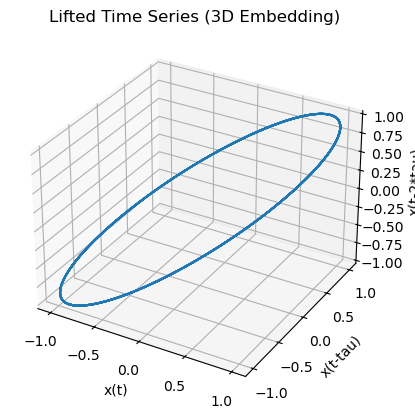

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def lift_signal_1d(signal, tau, D):
    """
    Lifts a 1D time series into a D-dimensional embedding space
    using time delays, specifically for a single extra dimension.

    Args:
        signal (numpy.ndarray): The input 1D time series.
        tau (int): The time delay (offset).
        D (int): The number of steps (embedding dimension).

    Returns:
        numpy.ndarray: The lifted time series (embedding).
    """

    N = len(signal)
    if N < (D - 1) * tau + 1:
        raise ValueError("Signal length is insufficient for the given tau and D.")

    lifted_signal = np.zeros((N - (D - 1) * tau, D))
    for i in range(N - (D - 1) * tau):
        for j in range(D):
            lifted_signal[i, j] = signal[i + j * tau]

    return lifted_signal

# Example Usage:
time_series = np.sin(np.linspace(0, 10 * np.pi, 500))  # Example sine wave
tau = 5  # Time delay
D = 3  # Embedding dimension (lifted to 3 dimensions)

lifted_data = lift_signal_1d(time_series, tau, D)

print("Original time series shape:", time_series.shape)
print("Lifted data shape:", lifted_data.shape)

# Plotting the lifted data (3D for D=3)
if D == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(lifted_data[:, 0], lifted_data[:, 1], lifted_data[:, 2])
    plt.title("Lifted Time Series (3D Embedding)")
    plt.xlabel("x(t)")
    plt.ylabel("x(t-tau)")
    ax.set_zlabel("x(t-2*tau)")
    plt.show()

elif D == 2:
    plt.figure()
    plt.plot(lifted_data[:, 0], lifted_data[:, 1])
    plt.title("Lifted Time Series (2D Embedding)")
    plt.xlabel("x(t)")
    plt.ylabel("x(t-tau)")
    plt.show()

else:
    print(f"Lifted data with dimension {D}. No plotting is done.")

Original time series shape: (500,)
Lifted data shape: (490, 3)


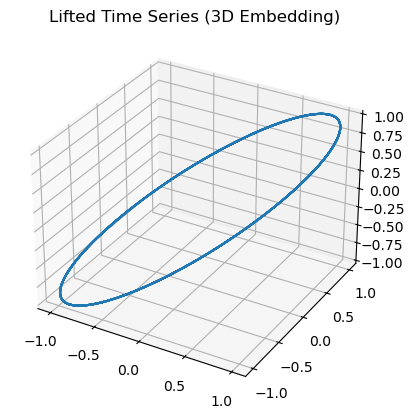

In [10]:
import numpy as np

def lift_signal(signal, tau, D):
    """
    Lifts a 1D time series into a D-dimensional embedding space
    using time delays.

    Args:
        signal (numpy.ndarray): The input 1D time series.
        tau (int): The time delay (offset).
        D (int): The embedding dimension (number of offsets).

    Returns:
        numpy.ndarray: The lifted time series (embedding).
    """

    N = len(signal)
    if N < (D - 1) * tau + 1:
        raise ValueError("Signal length is insufficient for the given tau and D.")

    lifted_signal = np.zeros((N - (D - 1) * tau, D))
    for i in range(N - (D - 1) * tau):
        for j in range(D):
            lifted_signal[i, j] = signal[i + j * tau]

    return lifted_signal

# Example Usage:
time_series = np.sin(np.linspace(0, 10 * np.pi, 500))  # Example sine wave
tau = 5  # Time delay
D = 3  # Embedding dimension

lifted_data = lift_signal(time_series, tau, D)

print("Original time series shape:", time_series.shape)
print("Lifted data shape:", lifted_data.shape)

# You can now plot the lifted data in 3D (for D=3) or perform other analyses.
if D == 3:
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(lifted_data[:, 0], lifted_data[:, 1], lifted_data[:, 2])
    plt.title("Lifted Time Series (3D Embedding)")
    plt.show()